# Lahman’s Baseball Database

This database contains pitching, hitting, and fielding statistics for
Major League Baseball from 1871 through 2016.  It includes data from
the two current leagues (American and National), the four other "major" 
leagues (American Association, Union Association, Players League, and
Federal League), and the National Association of 1871-1875. 

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
master = pd.read_csv("./baseballdatabank-2017.1/core/Master.csv")
master = master[['playerID','nameGiven','debut','finalGame']]

In [3]:
# Replacing current players final date with current date.
date_object = datetime.now()
formatted_date = date_object.strftime('%Y-%m-%d')
master.finalGame.fillna(formatted_date,inplace=True)

In [4]:
master.head(5)

,playerID,nameGiven,debut,finalGame
0,aardsda01,David Allan,2004-04-06,2015-08-23
1,aaronha01,Henry Louis,1954-04-13,1976-10-03
2,aaronto01,Tommie Lee,1962-04-10,1971-09-26
3,aasedo01,Donald William,1977-07-26,1990-10-03
4,abadan01,Fausto Andres,2001-09-10,2006-04-13


In [5]:
batting = pd.read_csv("./baseballdatabank-2017.1/core/Batting.csv")
# batting[batting.playerID == 'abercda01']
batting = batting[['playerID','R','G']]
batting.head(5)

,playerID,R,G
0,abercda01,0,1
1,addybo01,30,25
2,allisar01,28,29
3,allisdo01,28,27
4,ansonca01,29,25


In [6]:
# Lot of the records are missing values in some feilds. These values  are facts. More detailed analysis of fields and data outside 
# of our current dataset is required to fill in these missing values.So, to avoid incorrect analysis ,records with incomplete data 
# dropped.

def process_data(df):
    """
    Takes in pandas dataframe.Removes records with null values.
    Removes duplicates and returns the cleaned dataset.
    """
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df

In [7]:
master = process_data(master)
batting = process_data(batting)

##### Analysis of Batting stats of players.

###### Is there a positive corellation between highest runs and number of matches? Or is there a corellation between number of runs and number of years players play?

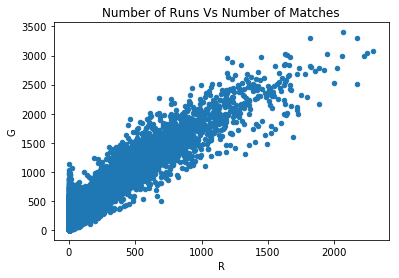

In [21]:
player_total_runs = batting.groupby(by='playerID',as_index = False).sum()
player_total_runs.sort_values(by = 'R',ascending=False)
player_total_runs.plot(x='R',y='G',style='o',kind='scatter',title='Number of Runs Vs Number of Matches')

In [34]:
master['daysPlayed'] = ((pd.to_datetime(master.finalGame) - pd.to_datetime(master.debut))/np.timedelta64(1, 'D')).astype('int64')

In [35]:
master['daysPlayed']

0        4156
1        8209
2        3456
3        4817
4        1676
5        2251
6          45
7        4758
8        1562
9        1464
10         34
11        879
12       4028
13       1572
14       3756
15       2775
16       1810
17         35
18       5100
19       2553
20          0
21        908
22          0
23       1557
24        588
25       6380
26        263
27        661
28       2069
29       1852
         ... 
19075    2721
19076      34
19077    4049
19078       0
19079      13
19080      15
19081    1466
19082    3643
19083       7
19084     838
19085     431
19086    4396
19087    5548
19088    3804
19089     313
19090    3715
19091      23
19092    3027
19093    3317
19094    4024
19095     891
19096     445
19097    1547
19098    1208
19099    1062
19100    1408
19101    3162
19102    2977
19103    2159
19104     355
Name: daysPlayed, dtype: int64

In [23]:
# are players becoming more risky these days.is it paying off.
master_player_runs.head(5)

,playerIDl,nameGiven,debut,finalGame,daysPlayed,playerID,R,G
0,aardsda01,David Allan,2004-04-06,2015-08-23,4156 days,aardsda01,0,331
1,aaronha01,Henry Louis,1954-04-13,1976-10-03,8209 days,aaronha01,2174,3298
2,aaronto01,Tommie Lee,1962-04-10,1971-09-26,3456 days,aaronto01,102,437
3,aasedo01,Donald William,1977-07-26,1990-10-03,4817 days,aasedo01,0,448
4,abadan01,Fausto Andres,2001-09-10,2006-04-13,1676 days,abadan01,1,15


In [50]:
master_player_runs = master.merge(player_total_runs,on='playerID',how='inner')
# master_player_runs.plot(x='R',y='daysPlayed',kind = 'scatter')

In [51]:
master_player_runs.sort_values(by='R',ascending=False)

,playerID,nameGiven,debut,finalGame,daysPlayed,R,G
7373,henderi01,Rickey Nelson Henley,1979-06-24,2003-09-19,8853,2295,3081
3152,cobbty01,Tyrus Raymond,1905-08-30,1928-09-11,8413,2246,3035
1541,bondsba01,Barry Lamar,1986-05-30,2007-09-26,7789,2227,2986
14837,ruthba01,George Herman,1914-07-11,1935-05-30,7628,2174,2503
1,aaronha01,Henry Louis,1954-04-13,1976-10-03,8209,2174,3298
14691,rosepe01,Peter Edward,1963-04-08,1986-08-17,8532,2070,3400
10839,mayswi01,Willie Howard,1951-05-25,1973-09-09,8143,2062,2992
14500,rodrial01,Alexander Enmanuel,1994-07-08,2016-08-12,8071,2021,2784
387,ansonca01,Adrian Constantine,1871-05-06,1897-10-03,9647,1996,2523
12181,musiast01,Stanley Frank,1941-09-17,1963-09-29,8047,1949,3026


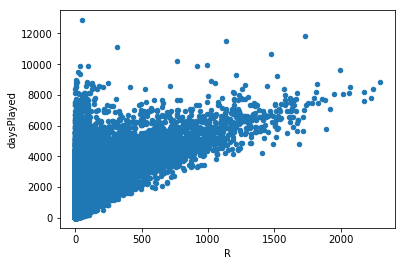

In [53]:
master_player_runs.plot(x='R',y='daysPlayed',kind = 'scatter')